# Prosper Loan Data Analysis

# Deepak Sithu

## Table of Contents

* <a href="#overview">Overview</a>
* <a href="#initial">Initial Exploration</a>
* <a href="#clean">Data Cleaning</a>
* <a href="#univar">Univariate Exploration</a>
* <a href="#bivar">Bivariate Exploration</a>
* <a href="#multivar">Multivariate Exploration</a>

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

<a id="overview"></a>
## Overview

> This project is an examination of loan data from Prosper. The data set contains information for 

> From the guide: This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. I'm supposed to focus on about 10-15 of the variables. Example questions are, what factors affect a loan's outcome status? What affects the borrower's APR or interest rate? Are there differences between loans depending on how large the original loan amount was?

In [2]:
# read in dataset
prosper_loan = pd.read_csv('prosperLoanData.csv')

<a id="initial"></a>
## Initial Exploration

In [3]:
# get shape of dataframe and information for columns
print(prosper_loan.shape)
prosper_loan.info()

(113937, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRa

In [4]:
# descriptions of numeric columns
prosper_loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [5]:
# head of dataframe
prosper_loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### What is the structure of the dataset?

> The dataset is a series of loans with a large amount of associated data for each. One interesting aspect is that the credit grading system changed in July 2009, so credit ratings are split between the columns CreditGrade and ProsperRating (Alpha). It's clear from the initial exploration into the dataset that, both for ease of use and for the scope of this project it is best to eliminate several of the columns which are not going to be relavent. 

### What are the main features of interest in the dataset?

> The main features of interest are the credit grades, which are split between CreditGrade and ProsperRating (Alpha), the LoanStatus, the BorrowerAPR, and the BorrowerRate. It will be interesting to see what, if any of the other variables in the dataset are correlated with differences in the previously mentioned features. Many of these are features which are  determined by the loan company, and therefore out of the control of the borrower, so seeing the relationship between these and variables which are more borrower-based will provide an insight into what goes into determining the specifics of a loan.

### What features in the dataset do you think will help support your investigation into the features of interest?

> The features which will be explored to see if they support an investigation into the features of interest are Term, ListingCategory, BorrowerState, EmploymentStatus, IsBorrowerHomeowner, OpenCreditLines, TotalCreditLinespast7years, DebtToIncomeRatio, and IncomeRange.

<a id="clean"></a>
## Data Cleaning

### Issues
* There are several columns in the dataset which are unnecessary or outside of the scope of this project.
* The column name ProsperRating (Alpha) affects ease of use of the dataset.
* The column ListingCategory (numeric) only has numeric values representing each listing type, but it would be more meaningful to include the actual listing types.
* The credit rating is split between the columns CreditGrade and ProsperRating, but would be useful as a single column, CreditRating.

#### Issue: There are several columns in the dataset which are unnecessary or outside of the scope of this project.

In [6]:
# create a copy of the dataframe with only columns the of interest and confirm change
prosper_clean = prosper_loan[['ListingKey', 'CreditGrade', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'BorrowerState', 'EmploymentStatus', 'IsBorrowerHomeowner', 'OpenCreditLines', 'TotalCreditLinespast7years', 'DebtToIncomeRatio', 'IncomeRange']].copy()
print(prosper_clean.shape)
prosper_clean.head()

(113937, 15)


,ListingKey,CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating (Alpha),ListingCategory (numeric),BorrowerState,EmploymentStatus,IsBorrowerHomeowner,OpenCreditLines,TotalCreditLinespast7years,DebtToIncomeRatio,IncomeRange
0,1021339766868145413AB3B,C,36,Completed,0.16516,0.1580,NaN,0,CO,Self-employed,True,4.0,12.0,0.17,"$25,000-49,999"
1,10273602499503308B223C1,NaN,36,Current,0.12016,0.0920,A,2,CO,Employed,False,14.0,29.0,0.18,"$50,000-74,999"
2,0EE9337825851032864889A,HR,36,Completed,0.28269,0.2750,NaN,0,GA,Not available,False,NaN,3.0,0.06,Not displayed
3,0EF5356002482715299901A,NaN,36,Current,0.12528,0.0974,A,16,GA,Employed,True,5.0,29.0,0.15,"$25,000-49,999"
4,0F023589499656230C5E3E2,NaN,36,Current,0.24614,0.2085,D,2,MN,Employed,True,19.0,49.0,0.26,"$100,000+"


#### Issue: The column name ProsperRating (Alpha) affects ease of use of the dataset.

In [7]:
# rename ProsperRating (Alpha) and confirm change
prosper_clean = prosper_clean.rename(columns={'ProsperRating (Alpha)' : 'ProsperRating'});
prosper_clean.head()

,ListingKey,CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating,ListingCategory (numeric),BorrowerState,EmploymentStatus,IsBorrowerHomeowner,OpenCreditLines,TotalCreditLinespast7years,DebtToIncomeRatio,IncomeRange
0,1021339766868145413AB3B,C,36,Completed,0.16516,0.1580,NaN,0,CO,Self-employed,True,4.0,12.0,0.17,"$25,000-49,999"
1,10273602499503308B223C1,NaN,36,Current,0.12016,0.0920,A,2,CO,Employed,False,14.0,29.0,0.18,"$50,000-74,999"
2,0EE9337825851032864889A,HR,36,Completed,0.28269,0.2750,NaN,0,GA,Not available,False,NaN,3.0,0.06,Not displayed
3,0EF5356002482715299901A,NaN,36,Current,0.12528,0.0974,A,16,GA,Employed,True,5.0,29.0,0.15,"$25,000-49,999"
4,0F023589499656230C5E3E2,NaN,36,Current,0.24614,0.2085,D,2,MN,Employed,True,19.0,49.0,0.26,"$100,000+"


#### Issue: The column ListingCategory (numeric) only has numeric values representing each listing type, but it would be more meaningful to include the actual listing types.

In [8]:
# create empty column ListingCategory to replace ListingCategory (numeric)
prosper_clean['ListingCategory'] = ""

In [9]:
# loop through dataset to fill ListingCategory based on ListingCategory (numeric)
for i in range(len(prosper_clean)):
    num = prosper_clean['ListingCategory (numeric)'][i]
    if num == 0:
        prosper_clean.at[i, 'ListingCategory'] = 'Not Available'
    elif num == 1:
        prosper_clean.at[i, 'ListingCategory'] = 'Debt Consolidation'
    elif num == 2:
        prosper_clean.at[i, 'ListingCategory'] = 'Home Improvement'
    elif num == 3:
        prosper_clean.at[i, 'ListingCategory'] = 'Business'
    elif num == 4:
        prosper_clean.at[i, 'ListingCategory'] = 'Personal Loan'
    elif num == 5:
        prosper_clean.at[i, 'ListingCategory'] = 'Student Use'
    elif num == 6:
        prosper_clean.at[i, 'ListingCategory'] = 'Auto'
    elif num == 7:
        prosper_clean.at[i, 'ListingCategory'] = 'Other'
    elif num == 8:
        prosper_clean.at[i, 'ListingCategory'] = 'Baby/Adoption'
    elif num == 9:
        prosper_clean.at[i, 'ListingCategory'] = 'Boat'
    elif num == 10:
        prosper_clean.at[i, 'ListingCategory'] = 'Cosmetic Procedure'
    elif num == 11:
        prosper_clean.at[i, 'ListingCategory'] = 'Engagement Ring'
    elif num == 12:
        prosper_clean.at[i, 'ListingCategory'] = 'Green Loans'
    elif num == 13:
        prosper_clean.at[i, 'ListingCategory'] = 'Household Expenses'
    elif num == 14:
        prosper_clean.at[i, 'ListingCategory'] = 'Large Purchases'
    elif num == 15:
        prosper_clean.at[i, 'ListingCategory'] = 'Medical/Dental'
    elif num == 16:
        prosper_clean.at[i, 'ListingCategory'] = 'Motorcycle'
    elif num == 17:
        prosper_clean.at[i, 'ListingCategory'] = 'RV'
    elif num == 18:
        prosper_clean.at[i, 'ListingCategory'] = 'Taxes'
    elif num == 19:
        prosper_clean.at[i, 'ListingCategory'] = 'Vacation'
    else:
        prosper_clean.at[i, 'ListingCategory'] = 'Wedding Loans'

In [10]:
# remove ListingCategory (numeric) from clean dataframe and confirm changes
prosper_clean = prosper_clean.drop('ListingCategory (numeric)', axis = 1)
prosper_clean.head()

,ListingKey,CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating,BorrowerState,EmploymentStatus,IsBorrowerHomeowner,OpenCreditLines,TotalCreditLinespast7years,DebtToIncomeRatio,IncomeRange,ListingCategory
0,1021339766868145413AB3B,C,36,Completed,0.16516,0.1580,NaN,CO,Self-employed,True,4.0,12.0,0.17,"$25,000-49,999",Not Available
1,10273602499503308B223C1,NaN,36,Current,0.12016,0.0920,A,CO,Employed,False,14.0,29.0,0.18,"$50,000-74,999",Home Improvement
2,0EE9337825851032864889A,HR,36,Completed,0.28269,0.2750,NaN,GA,Not available,False,NaN,3.0,0.06,Not displayed,Not Available
3,0EF5356002482715299901A,NaN,36,Current,0.12528,0.0974,A,GA,Employed,True,5.0,29.0,0.15,"$25,000-49,999",Motorcycle
4,0F023589499656230C5E3E2,NaN,36,Current,0.24614,0.2085,D,MN,Employed,True,19.0,49.0,0.26,"$100,000+",Home Improvement


#### Issue: The credit rating is split between the columns CreditGrade and ProsperRating, but would be useful as a single column, CreditRating.

In [11]:
# create two lists of the ListingKeys for non-null values for CreditGrade and ProsperRating
credit_grade_keys = prosper_clean.ListingKey[prosper_clean['CreditGrade'].notnull()].tolist();
prosper_rating_keys = prosper_clean.ListingKey[prosper_clean['ProsperRating'].notnull()].tolist();

In [12]:
# use python in and loop to check if any value in credit_grade_list is in prosper_rating_list
double_rating_keys = []
for i in range(len(credit_grade_keys)):
    if credit_grade_keys[i] in prosper_rating_keys:
        double_rating_keys.append(credit_grade_keys[i])
        print(credit_grade_keys[i])

In [13]:
# confirm double_rating_keys is empty
double_rating_keys

[]

In [14]:
# create empty CreditRating column to be filled by CreditGrade and ProsperRating
prosper_clean['CreditRating'] = "" 

In [15]:
# loop to fill CreditRating for CreditGrade values
for i in range(len(credit_grade_keys)):
    listing_row = (prosper_clean[prosper_clean['ListingKey'] == credit_grade_keys[i]])
    index = int(listing_row.index.values)
    prosper_clean.at[index, 'CreditRating'] = listing_row.CreditGrade.values[0]

In [16]:
# loop to fill CreditRating for ProsperRating values
for i in range(len(prosper_rating_keys)):
    listing_row = (prosper_clean[prosper_clean['ListingKey'] == prosper_rating_keys[i]])
    index = int(listing_row.index.values[0:1])
    prosper_clean.at[index, 'CreditRating'] = listing_row.ProsperRating.values[0]

In [17]:
# fill in empty CreditRatings as NC and confirm change
prosper_clean.CreditRating = prosper_clean.CreditRating.replace('', 'NC');
prosper_clean.head()

,ListingKey,CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating,BorrowerState,EmploymentStatus,IsBorrowerHomeowner,OpenCreditLines,TotalCreditLinespast7years,DebtToIncomeRatio,IncomeRange,ListingCategory,CreditRating
0,1021339766868145413AB3B,C,36,Completed,0.16516,0.1580,NaN,CO,Self-employed,True,4.0,12.0,0.17,"$25,000-49,999",Not Available,C
1,10273602499503308B223C1,NaN,36,Current,0.12016,0.0920,A,CO,Employed,False,14.0,29.0,0.18,"$50,000-74,999",Home Improvement,A
2,0EE9337825851032864889A,HR,36,Completed,0.28269,0.2750,NaN,GA,Not available,False,NaN,3.0,0.06,Not displayed,Not Available,HR
3,0EF5356002482715299901A,NaN,36,Current,0.12528,0.0974,A,GA,Employed,True,5.0,29.0,0.15,"$25,000-49,999",Motorcycle,A
4,0F023589499656230C5E3E2,NaN,36,Current,0.24614,0.2085,D,MN,Employed,True,19.0,49.0,0.26,"$100,000+",Home Improvement,D


### Storing

In [18]:
# create cleaned file if it doesn't already exist
if not os.path.exists('prosper_clean.csv'):
    prosper_clean.to_csv('prosper_clean.csv', index = False)

### Finalizing Dataset

In [23]:
# read in cleaned dataset
prosper = pd.read_csv('prosper_clean.csv')

In [24]:
# turn CreditGrade, ProsperRating, IncomeRange, and CreditRating into ordered categorical type variables and confirm change
ordinal_var_dict = {'CreditGrade': ['NC', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA'], 
                   'ProsperRating': ['HR', 'E', 'D', 'C', 'B', 'A', 'AA'],
                   'IncomeRange': ['Not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+'],
                   'CreditRating': ['NC', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, 
                                               categories = ordinal_var_dict[var])
    prosper[var] = prosper[var].astype(ordered_var)
    
prosper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 16 columns):
ListingKey                    113937 non-null object
CreditGrade                   28953 non-null category
Term                          113937 non-null int64
LoanStatus                    113937 non-null object
BorrowerAPR                   113912 non-null float64
BorrowerRate                  113937 non-null float64
ProsperRating                 84853 non-null category
BorrowerState                 108422 non-null object
EmploymentStatus              111682 non-null object
IsBorrowerHomeowner           113937 non-null bool
OpenCreditLines               106333 non-null float64
TotalCreditLinespast7years    113240 non-null float64
DebtToIncomeRatio             105383 non-null float64
IncomeRange                   113937 non-null category
ListingCategory               113937 non-null object
CreditRating                  113937 non-null category
dtypes: bool(1), category(4), flo

In [25]:
# use describe for additional information on finalized numeric variables
prosper.describe()

,Term,BorrowerAPR,BorrowerRate,OpenCreditLines,TotalCreditLinespast7years,DebtToIncomeRatio
count,113937.000000,113912.000000,113937.000000,106333.000000,113240.000000,105383.000000
mean,40.830248,0.218828,0.192764,9.260164,26.754539,0.275947
std,10.436212,0.080364,0.074818,5.022644,13.637871,0.551759
min,12.000000,0.006530,0.000000,0.000000,2.000000,0.000000
25%,36.000000,0.156290,0.134000,6.000000,17.000000,0.140000
50%,36.000000,0.209760,0.184000,9.000000,25.000000,0.220000
75%,36.000000,0.283810,0.250000,12.000000,35.000000,0.320000
max,60.000000,0.512290,0.497500,54.000000,136.000000,10.010000


In [26]:
# use shape and head for additional overview information to confirm all changes have been made to cleaned dataset
print(prosper.shape)
prosper.head()

(113937, 16)


,ListingKey,CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating,BorrowerState,EmploymentStatus,IsBorrowerHomeowner,OpenCreditLines,TotalCreditLinespast7years,DebtToIncomeRatio,IncomeRange,ListingCategory,CreditRating
0,1021339766868145413AB3B,C,36,Completed,0.16516,0.1580,NaN,CO,Self-employed,True,4.0,12.0,0.17,"$25,000-49,999",Not Available,C
1,10273602499503308B223C1,NaN,36,Current,0.12016,0.0920,A,CO,Employed,False,14.0,29.0,0.18,"$50,000-74,999",Home Improvement,A
2,0EE9337825851032864889A,HR,36,Completed,0.28269,0.2750,NaN,GA,Not available,False,NaN,3.0,0.06,Not displayed,Not Available,HR
3,0EF5356002482715299901A,NaN,36,Current,0.12528,0.0974,A,GA,Employed,True,5.0,29.0,0.15,"$25,000-49,999",Motorcycle,A
4,0F023589499656230C5E3E2,NaN,36,Current,0.24614,0.2085,D,MN,Employed,True,19.0,49.0,0.26,"$100,000+",Home Improvement,D


#### Variable Key:
* **ListingKey** - A unique key for each listing
* **CreditGrade** - The credit rating assigned at the time of listing for listings before July 2009 (then replaced by ProsperRating)
* **Term** - The length of the loan in months
* **LoanStatus** - The current status of the loan
* **BorrowerAPR** - The borrower's annual percentage rate (APR) for the loan
* **BorrowerRate** - The borrower's interest rate for the loan
* **ProsperRating** - The Prosper Rating assigned at the time of listing for listings after July 2009
* **BorrowerState** - The two letter abbreviation of the state of the address of the borrower
* **EmploymentStatus** - The employment status of the borrower
* **IsBorrowerHomeowner** - Whether the borrower has a mortgage on their credit profile or have provided documentation proving homeownership
* **OpenCreditLines** - The number of open credit lines on the credit profile
* **TotalCreditLinespast7years** - The number of credit lines in the past seven years on the credit profile
* **DebtToIncomeRatio** - The debt to income ratio of the borrower which is null if not available and capped at 10.01
* **IncomeRange** - The income range of the borrower
* **ListingCategory** - The category of the listing the borrower selected
* **CreditRating** - The combined columns of CreditGrade and ProsperRating, filling in NC for null values

<a id="univar"></a>
## Univariate Exploration

In [ ]:
# Here explore distributions of individual variables,
# if you see unusual points or outliers, take a deeper look to clean things up 
# and prepare yourself to look at relationships between variables

In [ ]:
# Make sure that, after every plot or related series of plots,
#you include a markdown cell with comments about what you observed and what you plan on investigating next!!!

In [27]:
prosper.head()

,ListingKey,CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,ProsperRating,BorrowerState,EmploymentStatus,IsBorrowerHomeowner,OpenCreditLines,TotalCreditLinespast7years,DebtToIncomeRatio,IncomeRange,ListingCategory,CreditRating
0,1021339766868145413AB3B,C,36,Completed,0.16516,0.1580,NaN,CO,Self-employed,True,4.0,12.0,0.17,"$25,000-49,999",Not Available,C
1,10273602499503308B223C1,NaN,36,Current,0.12016,0.0920,A,CO,Employed,False,14.0,29.0,0.18,"$50,000-74,999",Home Improvement,A
2,0EE9337825851032864889A,HR,36,Completed,0.28269,0.2750,NaN,GA,Not available,False,NaN,3.0,0.06,Not displayed,Not Available,HR
3,0EF5356002482715299901A,NaN,36,Current,0.12528,0.0974,A,GA,Employed,True,5.0,29.0,0.15,"$25,000-49,999",Motorcycle,A
4,0F023589499656230C5E3E2,NaN,36,Current,0.24614,0.2085,D,MN,Employed,True,19.0,49.0,0.26,"$100,000+",Home Improvement,D


In [38]:
# get base seaborn color to prevent rainbow plots
base = sns.color_palette()[0]

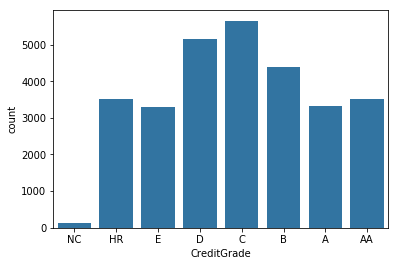

In [39]:
# bar chart for count of listings by CreditGrate
sns.countplot(data = prosper, x = 'CreditGrade', color = base);

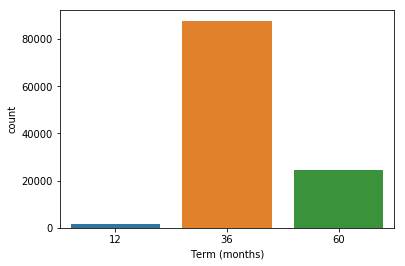

In [41]:
# bar chart for count of listings by Term 
sns.countplot(data = prosper, x = 'Term');
plt.xlabel('Term (months)');

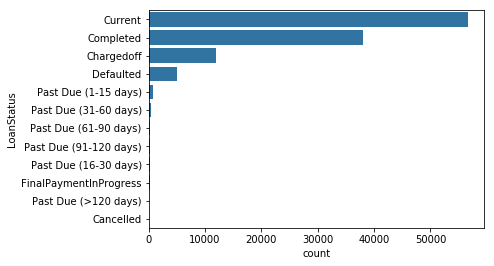

In [44]:
# bar plot of count of listings by LoanStatus ordered by count
loan_stat_order = prosper['LoanStatus'].value_counts().index
sns.countplot(data = prosper, y = 'LoanStatus',
              color = base,
              order = loan_stat_order);

In [55]:
# create dataset with only Past Due statuses for LoanStatus
prosper_pastdue = prosper[prosper['LoanStatus'].isin(['Past Due (1-15 days)', 
                                                      'Past Due (16-30 days)', 
                                                      'Past Due (31-60 days)', 
                                                      'Past Due (61-90 days)',
                                                      'Past Due (91-120 days)',
                                                      'Past Due (>120 days)'])]

In [62]:
# set LoanStatus as an ordered categorical variable 
loanstat_dict = {'LoanStatus': ['Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)']}

for var in loanstat_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, 
                                               categories = loanstat_dict[var])
    prosper_pastdue[var] = prosper_pastdue[var].astype(ordered_var)

C:\Users\deepak\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


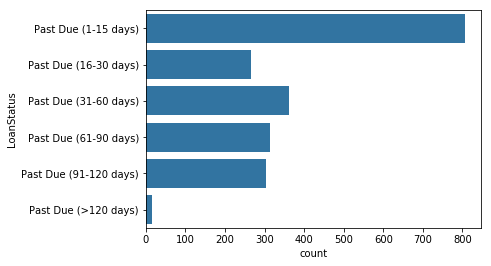

In [58]:
# bar chart of count of listings by LoanStatus for just past due loans
sns.countplot(data = prosper_pastdue, y = 'LoanStatus', color = base);

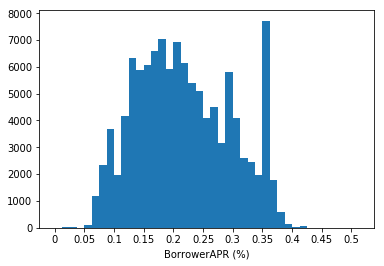

In [73]:
# histogram of BorrowerAPR with set bins and xticks
# shows interesting spites at 0.35797 and 0.3
inc = 0.0125
bins = np.arange(0, 0.51 + inc, inc)
xlocs = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
plt.hist(data = prosper, x = 'BorrowerAPR', bins = bins);
plt.xticks(xlocs, xlocs);
plt.xlabel('BorrowerAPR (%)');

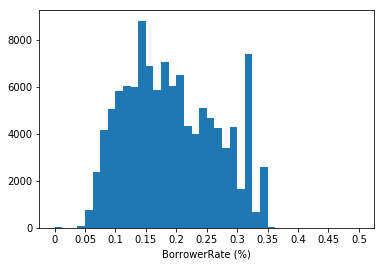

In [85]:
# histogram of Borrower Rate with set bins and xticks
# interesting spike at 0.3177
inc = 0.0125
bins = np.arange(0, 0.5 + inc, inc)
xlocs = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
plt.hist(data = prosper, x = 'BorrowerRate', bins = bins);
plt.xticks(xlocs, xlocs);
plt.xlabel('BorrowerRate (%)');

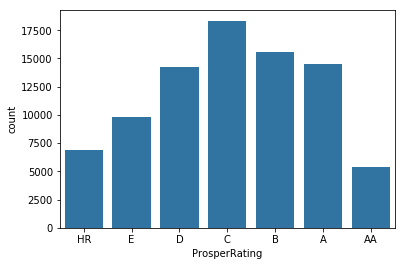

In [89]:
# bar chart of count of listings by ProsperRating
# interesting that there seem to be proportionally fewer AA listings
#   compared to similar CreditGrade bar chart 
sns.countplot(data = prosper, x = 'ProsperRating', color = base);

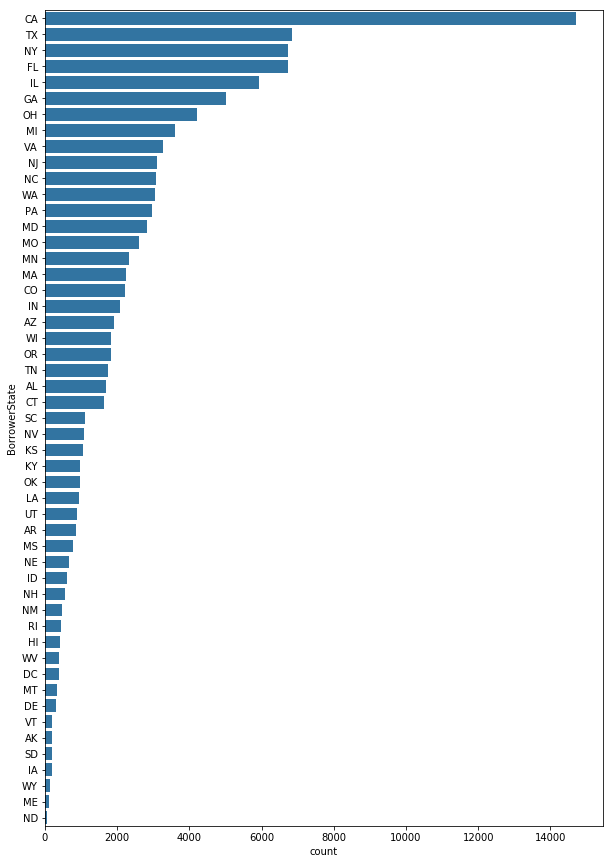

In [98]:
# bar chart of ordered listing count by BorrowerState with adjusted figsize
state_order = prosper['BorrowerState'].value_counts().index
plt.figure(figsize = (10,15))
sns.countplot(data = prosper, y = 'BorrowerState', color = base, order = state_order);

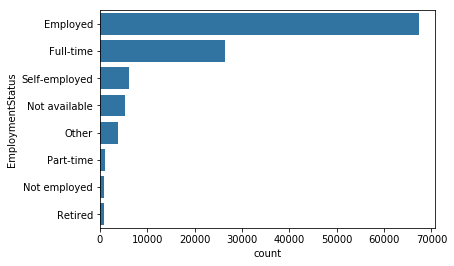

In [101]:
# bar chart of ordered listing count by EmploymentStatus
employment_order = prosper['EmploymentStatus'].value_counts().index
sns.countplot(data = prosper, y = 'EmploymentStatus', color = base, order = employment_order);

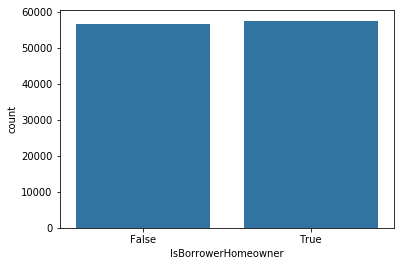

In [103]:
# bar chart of listing count by IsBorrowerHomeowner
# interestingly is nearly equal when displayed visually
sns.countplot(data = prosper, x = 'IsBorrowerHomeowner', color = base);

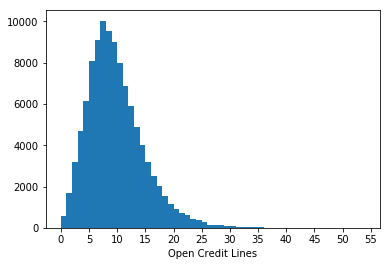

In [112]:
# histogram of OpenCreditLines with set bins and xticks
# shows incredibly smooth distribution with mode at 7
inc = 1
bins = np.arange(0, 54 + inc, inc)
xlocs = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]
plt.hist(data = prosper, x = 'OpenCreditLines', bins = bins);
plt.xticks(xlocs, xlocs);
plt.xlabel('Open Credit Lines');

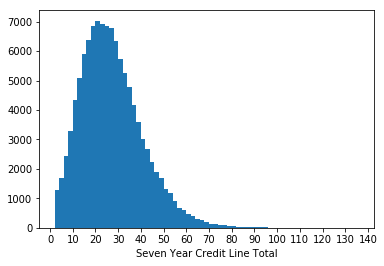

In [131]:
# histogram of TotalCreditLinespast7years with set bins and xticks
# again showing very normal right skewed distribution with mode at 21
inc = 2
bins = np.arange(2, 136 + inc, inc)
xlocs = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140]
plt.hist(data = prosper, x = 'TotalCreditLinespast7years', bins = bins);
plt.xticks(xlocs, xlocs);
plt.xlabel('Seven Year Credit Line Total');

* **ListingKey** - ID - full
* **CreditGrade** - ordered categorical (8) - missing 84,984
* **Term** - numeric discrete (3) - full
* **LoanStatus** - categorical (12) - full
* **BorrowerAPR** - numeric continuous - missing 25
* **BorrowerRate** - numeric continuous - full
* **ProsperRating** - ordered categorical (7) - missing 29,084
* **BorrowerState** - categorical (51) - missing 5,515
* **EmploymentStatus** - categorical (8) - missing 2,255 
* **IsBorrowerHomeowner** - boolean - full
* **OpenCreditLines** - numeric discrete (52) - missing 7,604
* **TotalCreditLinespast7years** - numeric discrete (118) - missing 697
* **DebtToIncomeRatio** - numeric continuous - missing 8,554
* **IncomeRange** - ordered categorical (8) - full
* **ListingCategory** - categorical (21) - full
* **CreditRating** - ordered categorical (8) - full

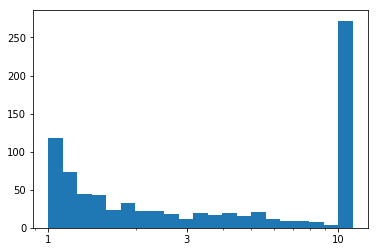

In [148]:
# histogram of MAKE A NORMAL ONE TOO BEFORE THIS ONE
#
inc = 0.05
bins = 10 ** np.arange(0, 1.000434 + inc, inc)
xlocs = [1, 3, 10]
labels = ['{}'.format(v) for v in xlocs]
plt.hist(data = prosper, x = 'DebtToIncomeRatio', color = base, bins = bins);
plt.xscale('log');
plt.xticks(xlocs, labels);

In [138]:
np.log10(prosper.DebtToIncomeRatio.describe())

C:\Users\deepak\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


count    5.022771
mean    -0.559175
std     -0.258251
min          -inf
25%     -0.853872
50%     -0.657577
75%     -0.494850
max      1.000434
Name: DebtToIncomeRatio, dtype: float64

### Discuss the distributions of your variables of interest. Were there any unusual points? Did you need to perform any transformations?

> asdf

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> asdf

<a id="bivar"></a>
## Bivariate Exploration

In [ ]:
# In this section, investigate relationships between pairs of variables in your data
# Make sure the variables that you cover here have been introduced in some fashion in the previous section (univariate)

### Talk about some of the relationships you observed in this part of the investigation. How did the features of interest vary with other features in the dataset?

> asdf

### Did you observe any interesting relationships between the other features (not the main features of interest)?

> asdf

<a id="multivar"></a>
## Multivariate Exploration

In [ ]:
# create plots of three or more variables to investigate your data further.
# make sure your investigations are justified, and follow from your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your features of interest?

> asdf

### Were there any interesting or surprising interactions between features?

> asdf

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report! XXXXXXX

there was an error in creating the CreditRatings column where certain values from the ProsperRatings column couldn't be indexed properly and so were put into CreditRatings as ''. This occured at most about 1,000 times, and likely fewer as there are some rows which had neither a CreditGrade nor Prosper Rating.